In [5]:
# Install Tika if not already installed
!pip install tika

# Import necessary libraries
from tika import parser
import os
import glob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Ensure the inline magic is included if using Jupyter
%matplotlib inline


In [6]:
# Function to convert PDF to text using Tika
def convertPdf2TxtWithTika(input_pdf, output_txt):
    # Parse the PDF file using Tika
    parsed = parser.from_file(input_pdf)
    
    # Handle cases where the content is None
    content = parsed['content'] if parsed['content'] is not None else ''
    
    # Write the extracted content to the output text file, handling encoding errors
    with open(output_txt, 'w', encoding='utf-8', errors='ignore') as f:
        f.write(content)


In [7]:
# Set input and output paths for the 30 resumes
inpath = r'C:\Exercise1-Resume\UnderGrad_Resumes\Input\\'
outpath = r'C:\Exercise1-Resume\UnderGrad_Resumes\Output\\'

# Process all PDF files in the input directory
count = 0
for file in glob.glob(inpath + '*.pdf'):
    justfile = os.path.basename(file).replace(".pdf", "")
    print('INFO: processing file = ' + justfile)
    output_file = os.path.join(outpath, justfile + '.txt')
    print('INFO: - in = ' + file + ', out = ' + output_file)
    
    # Convert PDF to text
    convertPdf2TxtWithTika(file, output_file)
    count += 1

print('INFO: processed total files = ' + str(count))


INFO: processing file = AndyWaters-Resume2024 - 08.22.24
INFO: - in = C:\Exercise1-Resume\UnderGrad_Resumes\Input\AndyWaters-Resume2024 - 08.22.24.pdf, out = C:\Exercise1-Resume\UnderGrad_Resumes\Output\\AndyWaters-Resume2024 - 08.22.24.txt
INFO: processing file = August 2024 Ryan Karbowniczak Resume
INFO: - in = C:\Exercise1-Resume\UnderGrad_Resumes\Input\August 2024 Ryan Karbowniczak Resume.pdf, out = C:\Exercise1-Resume\UnderGrad_Resumes\Output\\August 2024 Ryan Karbowniczak Resume.txt
INFO: processing file = BCS Resume
INFO: - in = C:\Exercise1-Resume\UnderGrad_Resumes\Input\BCS Resume.pdf, out = C:\Exercise1-Resume\UnderGrad_Resumes\Output\\BCS Resume.txt
INFO: processing file = Belcher__Taylor_Resume (3)
INFO: - in = C:\Exercise1-Resume\UnderGrad_Resumes\Input\Belcher__Taylor_Resume (3).pdf, out = C:\Exercise1-Resume\UnderGrad_Resumes\Output\\Belcher__Taylor_Resume (3).txt
INFO: processing file = CS Resume
INFO: - in = C:\Exercise1-Resume\UnderGrad_Resumes\Input\CS Resume.pdf, ou

In [8]:
# Combine the content of all text files into one string
pathFilesToUse = outpath

all_content = ''
count = 0
for file in glob.glob(pathFilesToUse + '*.txt'):
    print("file = " + file)
    with open(file, 'r', encoding='utf-8', errors='ignore') as file_handle:
        content = str(file_handle.read()).split()
        content_as_str = " ".join(content)
        all_content += content_as_str
        count += 1

print('INFO: processed total files = ' + str(count))


file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\AndyWaters-Resume2024 - 08.22.24.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\August 2024 Ryan Karbowniczak Resume.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\BCS Resume.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\Belcher__Taylor_Resume (3).txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\CS Resume.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\Curriculum Vitae (Nafisa Mehtaj).txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\Dudley Hallie MSBA Resume final June 2024.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\Francis_Resume_24.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\Jordan_Wood_Resume.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\JoshuaKolbuszResume.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\Khan Waleed Resume.txt
file = C:\Exercise1-Resume\UnderGrad_Resumes\Output\MalikSiddResume2024.txt
file = C:\Exercise1-Resume\UnderGrad_Re

In [9]:
# Function to draw word cloud
def wordcloud_draw(data, color='black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                             if 'http' not in word
                             and not word.startswith('@')
                             and not word.startswith('#')
                             and word != 'RT'
                             ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color=color,
                          width=2500,
                          height=2000
                          ).generate(cleaned_word)
    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


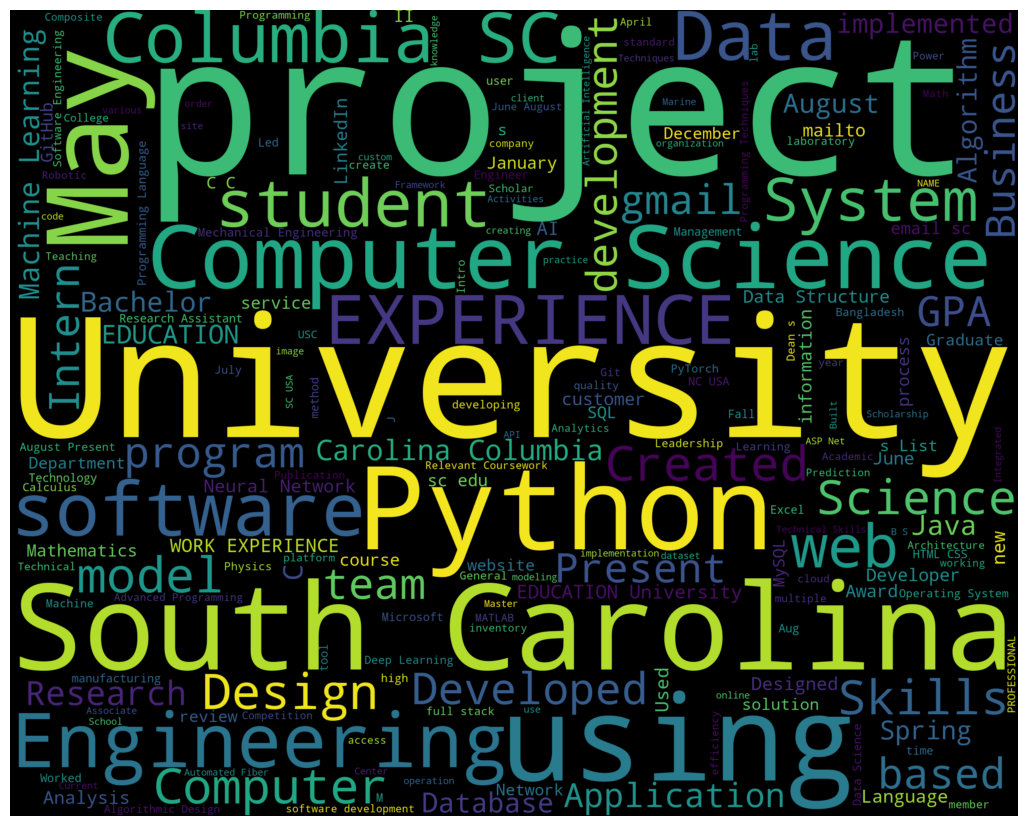

In [10]:
# Draw the word cloud from all content
wordcloud_draw(all_content.split())
